In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from sympy import symbols

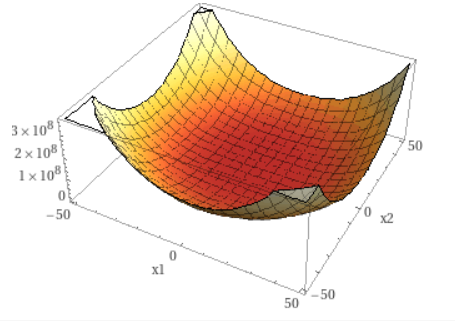

In [3]:
Image("img1.png")

In [ ]:
80 ((-3 + x1)^2 + (-5 + x2)^2) (-5 + x2)

In [4]:
x1 = symbols('x1')
x2 = symbols('x2')
func = 20 * ((x1-3)**2 - (x2-5)**2) **2 + (x1-1)**3
func

(x1 - 1)**3 + 20*((x1 - 3)**2 - (x2 - 5)**2)**2

In [5]:
def gradient(x):
    # x = [x1, x2]
    output = np.array([3* (-1 + x[0])**2 + 80 * (-3 + x[0]) *((-3 + x[0])**2 + (-5 + x[1])**2),\
                       80* ((-3 + x[0])**2 + (-5 + x[1])**2) * (-5 + x[1])], dtype=float)
    # output = f,i
    return output

In [24]:
def dfp_newton(x, iters, eps):
    lr = 0.2
    
    H = np.eye(2)*0.5
    x_len = x.shape[0]
    res = []
    for i in range(1, iters):
        g = gradient(x)
        if np.linalg.norm(g) < eps:
            break
        p = - np.dot(H, g)
        
        x_new = x + p * lr
        
        g_new = gradient(x_new)
        y = g_new - g
        s = x_new - x
        Hy = np.dot(H, y)
        y_t_H = np.dot(y, H)
        yHy = np.dot(np.dot(y, H), y)
        
        H = H - Hy.reshape([x_len, 1]) * y_t_H / yHy + s.reshape([x_len, 1]) * s / np.dot(s, y) 
        res.append(x)
        x = x_new
    return np.array(res)

In [25]:
iters = 1000
x = np.array([10,-5], dtype=float)
eps = 1e-7

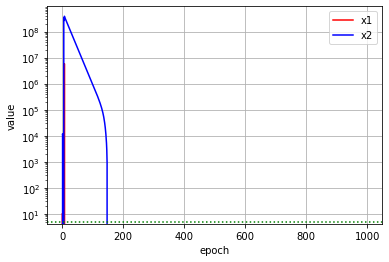

In [26]:
dfp_res = dfp_newton( x, iters, eps)

plt.plot(range(len(dfp_res)), dfp_res.T[0],'r', label='x1')
plt.plot(range(len(dfp_res)), dfp_res.T[1],'b', label='x2')
plt.yscale('log')
plt.grid('on')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.axhline(5, color='g', ls='dotted')

In [38]:
def bdfp_newton( x, iters, eps):
    lr = 1
    
    B =  np.eye(2) * 3
    x_len = x.shape[0]
    res = []
    for i in range(1, iters):
        g = gradient(x)
        if np.linalg.norm(g) < eps:
            break
        p = np.linalg.solve(B, g)
        
        x_new = x - p*lr
        g_new = gradient(x_new)
        y = g_new - g
        s = x_new - x
        y_t = y.reshape([x_len, 1])
        Bs = np.dot(B, s)
        s_t_B = np.dot(s, B)
        sBs = np.dot(np.dot(s, B), s)
        
        B = B - Bs.reshape([x_len, 1]) * s_t_B / sBs + y_t*y/np.dot(y, s) 
        res.append(x)
        x = x_new
    return np.array(res)
    

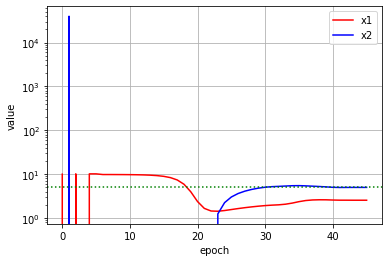

In [39]:
bdfp_res = bdfp_newton( x, iters, eps)
plt.plot(range(len(bdfp_res)), bdfp_res.T[0],'r', label='x1')
plt.plot(range(len(bdfp_res)), bdfp_res.T[1],'b', label='x2')
plt.yscale('log')
plt.grid('on')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.axhline(5, color='g', ls='dotted')

(-10.0, 10.0)

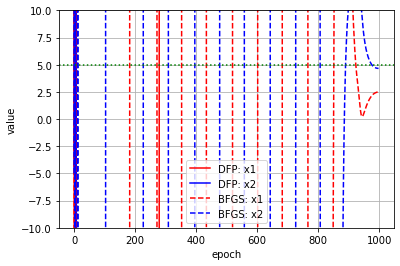

In [23]:
plt.plot(range(len(dfp_res)), dfp_res.T[0],'r', label='DFP: x1')
plt.plot(range(len(dfp_res)), dfp_res.T[1],'b', label='DFP: x2')
plt.plot(range(len(bdfp_res)), bdfp_res.T[0],'r', label='BFGS: x1', ls='dashed')
plt.plot(range(len(bdfp_res)), bdfp_res.T[1],'b', label='BFGS: x2', ls='dashed')
#plt.yscale('log')
plt.grid('on')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.axhline(5, color='g', ls='dotted')
plt.ylim([-10,10])

In [263]:
np.linalg.norm(gradient(bdfp_res[-1]))

3.296069417928329e-05

In [195]:
np.linalg.norm(gradient(dfp_res[-1]))

1.9201509677708453e+25